In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from sklearn import preprocessing
import requests
import pickle
from io import BytesIO

import urllib
import json

# Utility Functions

In [43]:
def scrop(img, rdim=None):
    """square center crop"""
    cdim = min([img.width, img.height])
    width, height = img.size
    
    left =   (width  - cdim)/2
    top =    (height - cdim)/2
    right =  (width  + cdim)/2
    bottom = (height + cdim)/2
    
    if rdim:
        return img.crop((left, top, right, bottom)).resize((rdim, rdim))
    else:
        return img.crop((left, top, right, bottom))

def url_imread(url, asaray=False):
    response = requests.get(url)
    if asaray:
        return np.asarray(Image.open(BytesIO(response.content)))
    else:
        return Image.open(BytesIO(response.content))

def imshows(imgs, labels=None, scale=10):
    n = len(imgs)
    fig, axs = plt.subplots(nrows=1, ncols=n, figsize=(scale*n, scale))
    for i in range(n):
        axs[i].imshow(imgs[i])
        if labels:
            axs[i].title(labels[i])
    plt.show()

# Flickr API Code

In [41]:
API_KEY = 'ce4810d60080dfc94cb0efe7a6f8a5d1'

('http://farm' + str(item['farm'])
 + '.static.flickr.com/' + str(item['server'])
 + '/' + str(item['id']) + '_'
 + str(item['secret']) + '_m.jpg')

def flickr_api_call(query, limit=10):
    """Returns a list of image urls
    corresponding to the query keyword."""
    request = ('https://api.flickr.com/services/rest/?method=flickr.photos.search'
               + '&api_key=' + API_KEY
               + '&text=' + urllib.quote(query)
               + '&per_page=' + str(limit)
               + '&format=json&nojsoncallback=1')
    response = json.loads(urllib.urlopen(request).read())
    items = response['photos']['photo']
    urls = []
    for item in items:
        url = ('http://farm' + str(item['farm'])
               + '.static.flickr.com/' + str(item['server'])
               + '/' + str(item['id']) + '_'
               + str(item['secret']) + '_m.jpg')
        urls.append(url)
    return urls

flickr_api_call('cat', 10)

['http://farm5.static.flickr.com/4187/34506405152_31925a9180_m.jpg',
 'http://farm5.static.flickr.com/4193/33825774654_1d265994af_m.jpg',
 'http://farm5.static.flickr.com/4169/34283051260_078c8b527d_m.jpg',
 'http://farm5.static.flickr.com/4172/34627346316_85e3490ee4_m.jpg',
 'http://farm5.static.flickr.com/4161/34537769931_8951591bc6_m.jpg',
 'http://farm5.static.flickr.com/4162/33858351123_733c698a57_m.jpg',
 'http://farm5.static.flickr.com/4191/34627326686_99d6e0a41d_m.jpg',
 'http://farm5.static.flickr.com/4158/34506331672_baf1649154_m.jpg',
 'http://farm5.static.flickr.com/4177/34283001860_c23743805e_m.jpg',
 'http://farm5.static.flickr.com/4194/34506353562_f7b60fbbd4_m.jpg']

# API Requests

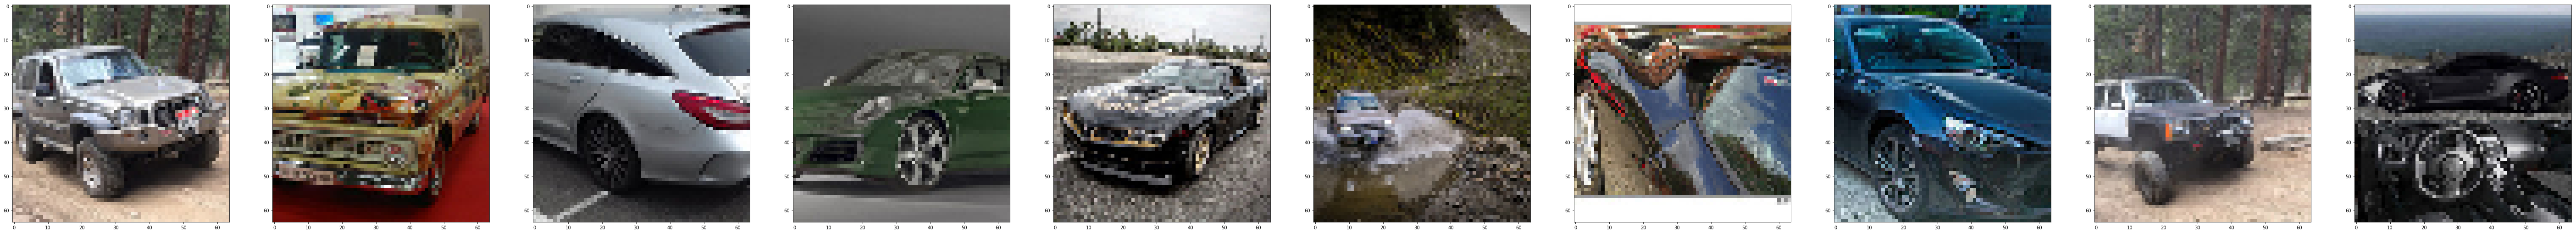

In [44]:
imshows([scrop(url_imread(url), rdim=64) for url in flickr_api_call('car', 10)])